# Exploratory Data Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#checking the data
original_df = pd.read_csv('./data/dataset_step1_original.csv')
original_df.head(n=5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [31]:
original_df.tail(n=5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [ ]:
#let's see the statistic description of all features

In [32]:
#for this, we need to fix the dtypes
original_df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [33]:
original_df = original_df.astype({'id':'object', 
            'Driving_License':'object',
            'Region_Code':'object',
            'Previously_Insured':'object',
            'Policy_Sales_Channel':'object',
            'Response':'object',
           })

In [34]:
original_df.dtypes

id                       object
Gender                   object
Age                       int64
Driving_License          object
Region_Code              object
Previously_Insured       object
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel     object
Vintage                   int64
Response                 object
dtype: object

In [35]:
#statistic description for numeric features
original_df.describe(include=['int', 'float'])

,Age,Annual_Premium,Vintage
count,381109.000000,381109.000000,381109.000000
mean,38.822584,30564.389581,154.347397
std,15.511611,17213.155057,83.671304
min,20.000000,2630.000000,10.000000
25%,25.000000,24405.000000,82.000000
50%,36.000000,31669.000000,154.000000
75%,49.000000,39400.000000,227.000000
max,85.000000,540165.000000,299.000000


In [36]:
#statistic description for categorical features
original_df.describe(include=['object'])

,id,Gender,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Response
count,381109,381109,381109,381109.0,381109,381109,381109,381109.0,381109
unique,381109,2,2,53.0,2,3,2,155.0,2
top,1,Male,1,28.0,0,1-2 Year,Yes,152.0,0
freq,1,206089,380297,106415.0,206481,200316,192413,134784.0,334399


### Now let's do the following:

- check null values (✓)
- check duplicates (✓)
- check that data is consistent (✓)
- check for outliers (✓)
- examine the correlation among numeric variables (✓)
- Extra: examine the correlation (X^2) between response and apparently most important categorical variable - Previously_Insured (✓)

### we see no missing values:

In [45]:
original_df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

### we see no duplicates: 

In [39]:
original_df.duplicated().sum()

0

### No inconsistent values in attributes:

In [40]:
for i in original_df.columns:
    a = original_df[i].unique()
    print('\n')
    print(i)
    print('\n')
    print(a)



id


[1 2 3 ... 381107 381108 381109]


Gender


['Male' 'Female']


Age


[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]


Driving_License


[1 0]


Region_Code


[28.0 3.0 11.0 41.0 33.0 6.0 35.0 50.0 15.0 45.0 8.0 36.0 30.0 26.0 16.0
 47.0 48.0 19.0 39.0 23.0 37.0 5.0 17.0 2.0 7.0 29.0 46.0 27.0 25.0 13.0
 18.0 20.0 49.0 22.0 44.0 0.0 9.0 31.0 12.0 34.0 21.0 10.0 14.0 38.0 24.0
 40.0 43.0 32.0 4.0 51.0 42.0 1.0 52.0]


Previously_Insured


[0 1]


Vehicle_Age


['> 2 Years' '1-2 Year' '< 1 Year']


Vehicle_Damage


['Yes' 'No']


Annual_Premium


[ 40454.  33536.  38294. ...  20706. 101664.  69845.]


Policy_Sales_Channel


[26.0 152.0 160.0 124.0 14.0 13.0 30.0 156.0 163.0 157.0 122.0 19.0 22.0
 15.0 154.0 16.0 52.0 155.0 11.0 151.0 125.0 25.0 61.0 1.0 86.0 31.0 150.0
 23.0 60.0 21.0 121.0 3.0 139.0 12.0 29.0 55.0 7.0 47.0 127.

### Check for outliers:

<Axes: xlabel='Gender', ylabel='Annual_Premium'>

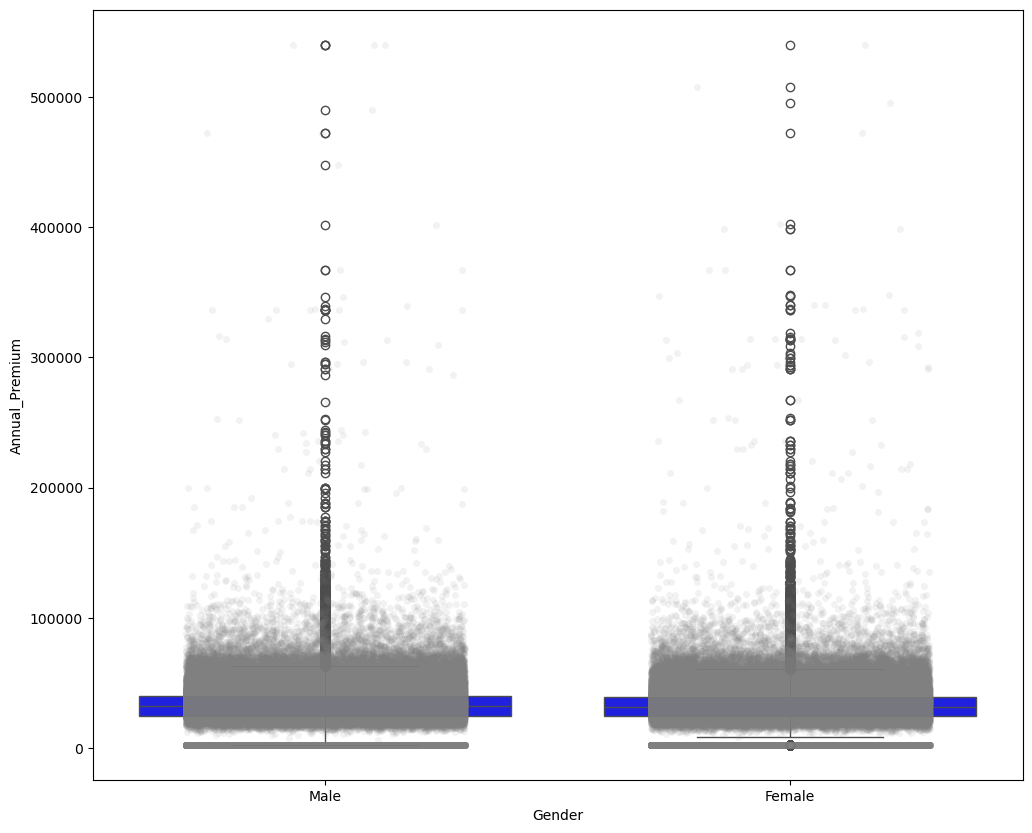

In [48]:
plt.figure(figsize=(12,10))
sns.boxplot(data=original_df,
           x='Gender',
           y='Annual_Premium',
           color='b',
           )
sns.stripplot(data=original_df, 
              x='Gender', 
              y='Annual_Premium', 
              jitter=.3, 
              color='grey', 
              alpha=.1,
             )

<Axes: xlabel='Annual_Premium', ylabel='Count'>

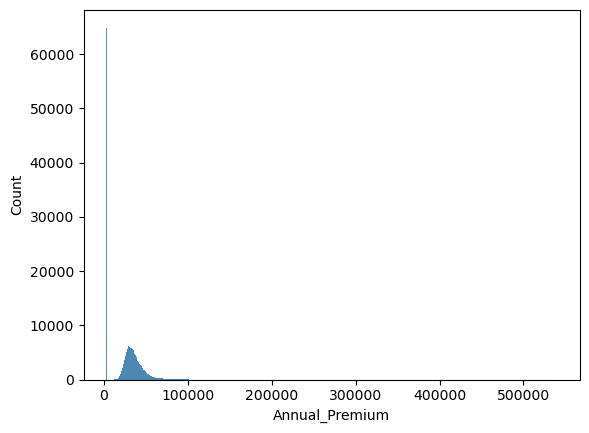

In [52]:
#since we see the annual_premium feature has outliers, let's examine its distribution
#we see that this distribution is skewed, as we expected
sns.histplot(original_df['Annual_Premium'])

<div class="alert alert-danger">
    
### There are outliers in Annual_Premium:
### **Do we want to get rid of them?**
    Answer: No - Visualizations in Tableau show that these outliers don't cause any trends (we figured it out by building a linear regression model in Tableau)
</div>

# Also, there is no obvious correlation between numeric variables:

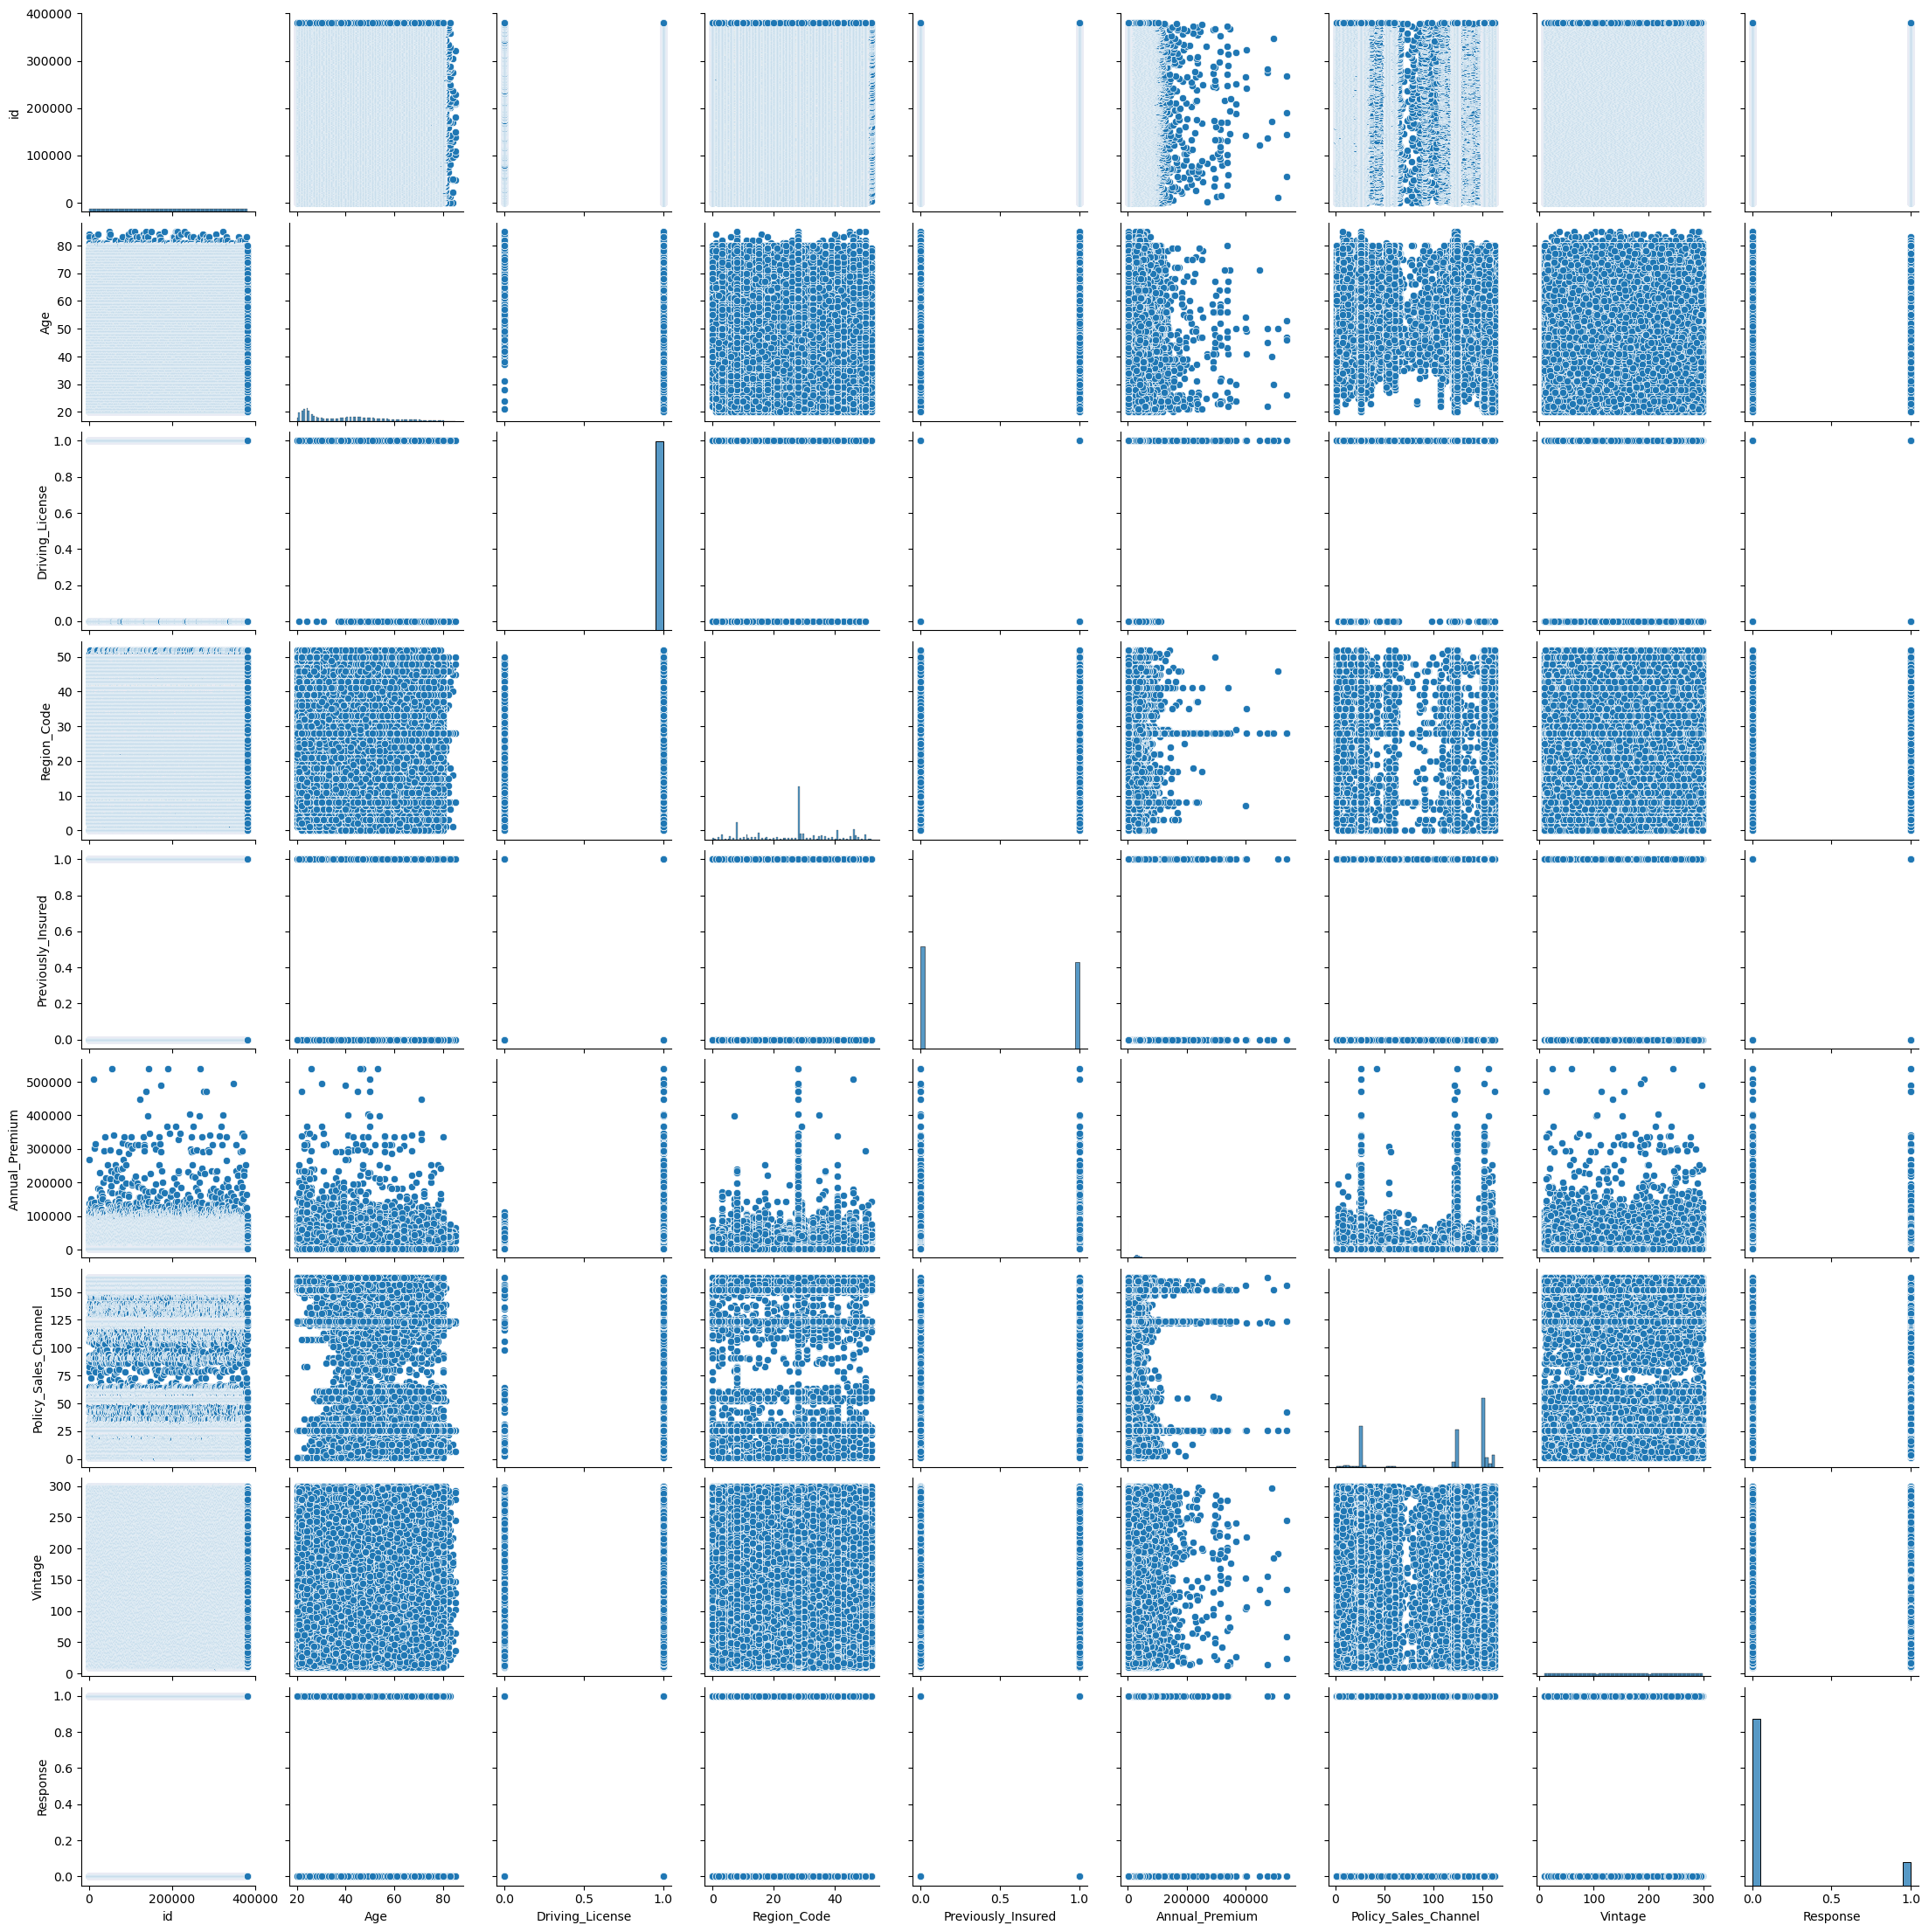

In [53]:
sns.pairplot(data=original_df)
plt.show()

<Axes: >

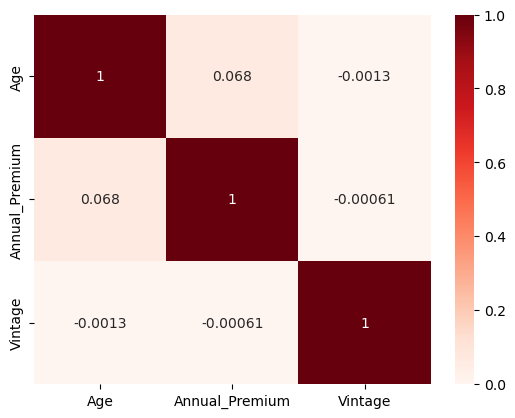

In [54]:
#let's see if there is any correlation between non-binary numeric features: age, annual_premium, vintage 
#we see no correlation
sns.heatmap(original_df[['Age','Annual_Premium','Vintage']].corr(), annot=True, cmap='Reds')

### Exta: Based on our Tableau visualizations, we decided that feature Previously_Insured might have the highest correlation with the target varibale Response.
### Let's see if there is any correlation between these two categorical variables. 

### Source of the coding approach: https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/

We examine the correlation between Previously_Insured and Response

Let's put 

H0 = the categorical variables are independent 

H1 = there is a correlation between categorical variables

Let alpha=0.05

In [78]:
#the percentage of negative cases for Response
original_df[original_df['Response']==0].shape[0]/original_df.shape[0]

0.877436638861848

In [79]:
np.random.seed(10)
# Sample first attribute data randomly at fixed probabilities
#type_bottle = np.random.choice(a= ["paper","cans","glass","others","plastic"],
                              #p = [0.05, 0.15 ,0.25, 0.05, 0.5],
                              #size=1000)

response_type = np.random.choice(a= ['no', 'yes'], p=[.87, .13],size=1000)
response_type[:5]

array(['no', 'no', 'no', 'no', 'no'], dtype='<U3')

In [80]:
#the percentage of negative cases for Previously_Insured
original_df[original_df['Previously_Insured']==0].shape[0]/original_df.shape[0]

0.5417898816349128

In [81]:
# Sample second attribute data randomly at fixed probabilities
previously_insured_type = np.random.choice(a= ['no','yes'],
                                           p=[.54, .46],
                                           size=1000)
previously_insured_type[:5]

array(['no', 'yes', 'no', 'yes', 'no'], dtype='<U3')

In [82]:
responses_vs_prev = pd.DataFrame({"response_type":response_type, 
                                      "previously_insured_type":previously_insured_type
                                     })
responses_vs_prev

,response_type,previously_insured_type
0,no,no
1,no,yes
2,no,no
3,no,yes
4,no,no
...,...,...
995,no,yes
996,no,no
997,no,no
998,no,yes


In [83]:
#This is our contigency table

responses_vs_prev_tab = pd.crosstab(responses_vs_prev.response_type, 
                                    responses_vs_prev.previously_insured_type, 
                                    margins = True
                                   )
responses_vs_prev_tab.columns = ["no","yes","row_totals"]
responses_vs_prev_tab.index = ["not_insured_prev","insured_prev","col_totals"]

responses_vs_prev_tab

,no,yes,row_totals
not_insured_prev,465,413,878
insured_prev,67,55,122
col_totals,532,468,1000


In [84]:
#Showing the observed values
# Get table without totals for later use
observed = responses_vs_prev_tab.iloc[0:2,0:2]  
observed

,no,yes
not_insured_prev,465,413
insured_prev,67,55


In [85]:
#Showing the expected values
expected =  np.outer(responses_vs_prev_tab["row_totals"][0:2],
                     responses_vs_prev_tab.loc["col_totals"][0:2]) / 1000
expected = pd.DataFrame(expected)
 
expected.columns = ["no","yes"]
expected.index = ["not_insured_prev","insured_prev"]
 
expected

,no,yes
not_insured_prev,467.096,410.904
insured_prev,64.904,57.096


In [87]:
#Calculating chi-square statistic

chi_squared_stat = (((observed-expected)**2)/expected).sum().sum()
chi_squared_stat

#Note: We call .sum() twice, once to get the column sums and a second time to add the 
#column sums together, returning the sum of the entire 2D table.

0.1647292513466126

In [88]:
#Calculating critical value

from scipy.stats import chi2

critical_value= chi2.ppf(q = 0.95, df = 1)
# Find the critical value for 95% confidence, so we set alpha=0.05
# df= degree of freedom = (r-1)(c-1)= 1

critical_value

3.841458820694124

In [89]:
#Calculating p-value

p_value = 1 - chi2.cdf(x=chi_squared_stat, df=1)
# Find the p-value

p_value

0.6848392132149086

### Conclusion:
- p_value > alpha -> We fail to reject H0

- chi_squared_stat < critical_value -> we fail to reject H0

### We can't say that Response and Previously_insured are highly correlated categories.

# Data Preprocessing

### We start with the original dataset

In [3]:
import pandas as pd
import numpy as np

In [6]:
df_step1 = pd.read_csv('./data/dataset_step1_original.csv')

In [7]:
df_step1

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [10]:
#let's check for null values
df_step1.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [13]:
#check for duplicates
df_step1.duplicated().sum()

0

In [15]:
#number of unique values for region codes
df_step1['Region_Code'].nunique()

53

### We see, that region code column represents US states, federal district, and various minor territories 

### At this point, we add new columns (containing information per region code) to this set: 
- ### Number of registered vehicles, 
- ### Average number of vehicles per hausehold.
### In addition, we summiraze the Region Code column into Region column

### That's our updated dataset:

In [28]:
df_step2 = pd.read_csv('./data/dataset_step2_not_encoded.csv')

In [30]:
df_step2 = df_step2.drop(columns=['Unnamed: 0'])
df_step2

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Per_HouseHold,Vehicle_Registered,Region
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1,2.56,57659691,Midwest
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0,2.33,33986669,Southwest
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1,2.56,57659691,Midwest
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0,2.32,79914463,South
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0,2.32,79914463,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26,1,1-2 Year,No,30170,26,88,0,2.32,79914463,South
381105,381106,Male,30,1,37,1,< 1 Year,No,40016,152,131,0,2.33,33986669,Southwest
381106,381107,Male,21,1,30,1,< 1 Year,No,35118,160,161,0,2.15,11857396,New England
381107,381108,Female,68,1,14,0,> 2 Years,Yes,44617,124,74,0,2.56,57659691,Midwest


In [31]:
#now, we can get rid of region code column, for the sake of data redusity
df_step2 = df_step2.drop(columns=['Region_Code'])
df_step2

,id,Gender,Age,Driving_License,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Per_HouseHold,Vehicle_Registered,Region
0,1,Male,44,1,0,> 2 Years,Yes,40454,26,217,1,2.56,57659691,Midwest
1,2,Male,76,1,0,1-2 Year,No,33536,26,183,0,2.33,33986669,Southwest
2,3,Male,47,1,0,> 2 Years,Yes,38294,26,27,1,2.56,57659691,Midwest
3,4,Male,21,1,1,< 1 Year,No,28619,152,203,0,2.32,79914463,South
4,5,Female,29,1,1,< 1 Year,No,27496,152,39,0,2.32,79914463,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,1,1-2 Year,No,30170,26,88,0,2.32,79914463,South
381105,381106,Male,30,1,1,< 1 Year,No,40016,152,131,0,2.33,33986669,Southwest
381106,381107,Male,21,1,1,< 1 Year,No,35118,160,161,0,2.15,11857396,New England
381107,381108,Female,68,1,0,> 2 Years,Yes,44617,124,74,0,2.56,57659691,Midwest


In [32]:
#now, we code run one-hot encoding for those columns, that contain categorical values 
#we pick one-hot encoding since our categorical variables don't contain internal order
#we don't encode policy_sales_channel as it contains too many values which would lead to inadequately high number of new columns 

df_step2 = pd.get_dummies(data = df_step2, columns=['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'Region'], dtype=int)
train_df_py_v1 = train_df_py_v1.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_Age_Less_1_Year',
                                        'Vehicle_Age_> 2 Years':'Vehicle_Age_More_2_Years',
                                       })

In [36]:
df_step2 = df_step2.drop(columns=['Gender_Female','Vehicle_Damage_No'])

In [40]:
df_step2 = df_step2.rename(columns={'Vehicle_Age_< 1 Year':'Vehicle_Age_Less_1_Year',
                                        'Vehicle_Age_> 2 Years':'Vehicle_Age_More_2_Years',
                                    'Region_Middle Atlantic':'Region_Middle_Atlantic',
                                    'Region_New England':'Region_New_England',
                                    
                                       })

In [47]:
df_step2

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Per_HouseHold,Vehicle_Registered,...,Vehicle_Age_Less_1_Year,Vehicle_Age_More_2_Years,Vehicle_Damage_Yes,Region_Middle_Atlantic,Region_Midwest,Region_New_England,Region_Others,Region_South,Region_Southwest,Region_West
0,1,44,1,0,40454,26,217,1,2.56,57659691,...,0,1,1,0,1,0,0,0,0,0
1,2,76,1,0,33536,26,183,0,2.33,33986669,...,0,0,0,0,0,0,0,0,1,0
2,3,47,1,0,38294,26,27,1,2.56,57659691,...,0,1,1,0,1,0,0,0,0,0
3,4,21,1,1,28619,152,203,0,2.32,79914463,...,1,0,0,0,0,0,0,1,0,0
4,5,29,1,1,27496,152,39,0,2.32,79914463,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,1,30170,26,88,0,2.32,79914463,...,0,0,0,0,0,0,0,1,0,0
381105,381106,30,1,1,40016,152,131,0,2.33,33986669,...,1,0,0,0,0,0,0,0,1,0
381106,381107,21,1,1,35118,160,161,0,2.15,11857396,...,1,0,0,0,0,1,0,0,0,0
381107,381108,68,1,0,44617,124,74,0,2.56,57659691,...,0,1,1,0,1,0,0,0,0,0


In [41]:
df_step2.columns

Index(['id', 'Age', 'Driving_License', 'Previously_Insured', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'Vehicle_Per_HouseHold',
       'Vehicle_Registered', 'Gender_Male', 'Vehicle_Age_1-2 Year',
       'Vehicle_Age_Less_1_Year', 'Vehicle_Age_More_2_Years',
       'Vehicle_Damage_Yes', 'Region_Middle_Atlantic', 'Region_Midwest',
       'Region_New_England', 'Region_Others', 'Region_South',
       'Region_Southwest', 'Region_West'],
      dtype='object')

### Now that we have added new features and got them encoded, we can balance our dataset

In [43]:
### Here is our ecnoded dataset with new features:

In [45]:
df_step3 = pd.read_csv('./data/dataset_step3_not_balanced.csv')

In [48]:
df_step3 = df_step3.drop(columns=('Unnamed: 0'))
df_step3

,id,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Per_HouseHold,Vehicle_Registered,...,Vehicle_Age_Less_1_Year,Vehicle_Age_More_2_Years,Vehicle_Damage_Yes,Region_Middle Atlantic,Region_Midwest,Region_New England,Region_Others,Region_South,Region_Southwest,Region_West
0,1,44,1,0,40454,26,217,1,2.5,1935357,...,0,1,1,0,1,0,0,0,0,0
1,2,76,1,0,33536,26,183,0,2.3,6053781,...,0,0,0,0,0,0,0,0,1,0
2,3,47,1,0,38294,26,27,1,2.5,1935357,...,0,1,1,0,1,0,0,0,0,0
3,4,21,1,1,28619,152,203,0,2.3,8829596,...,1,0,0,0,0,0,0,1,0,0
4,5,29,1,1,27496,152,39,0,2.3,4561299,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,74,1,1,30170,26,88,0,2.3,5587022,...,0,0,0,0,0,0,0,1,0,0
381105,381106,30,1,1,40016,152,131,0,2.5,3730247,...,1,0,0,0,0,0,0,0,1,0
381106,381107,21,1,1,35118,160,161,0,2.5,1357535,...,1,0,0,0,0,1,0,0,0,0
381107,381108,68,1,0,44617,124,74,0,2.2,10587725,...,0,1,1,0,1,0,0,0,0,0


In [49]:
#now, we need to get it balanced
#balancing imbalanced train dataset 
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [50]:
x = df_step3.drop(['Response','id'], axis=1)
y = df_step3[['Response']]

In [51]:
x_smote, y_smote = smote.fit_resample(x, y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Response
0           334399
1            46710
dtype: int64

Response
0           334399
1           334399
dtype: int64


In [52]:
x_smote['Response'] = y_smote
x_smote

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Per_HouseHold,Vehicle_Registered,Gender_Male,Vehicle_Age_1-2 Year,...,Vehicle_Age_More_2_Years,Vehicle_Damage_Yes,Region_Middle Atlantic,Region_Midwest,Region_New England,Region_Others,Region_South,Region_Southwest,Region_West,Response
0,44,1,0,40454,26,217,2.5,1935357,1,0,...,1,1,0,1,0,0,0,0,0,1
1,76,1,0,33536,26,183,2.3,6053781,1,1,...,0,0,0,0,0,0,0,1,0,0
2,47,1,0,38294,26,27,2.5,1935357,1,0,...,1,1,0,1,0,0,0,0,0,1
3,21,1,1,28619,152,203,2.3,8829596,1,0,...,0,0,0,0,0,0,1,0,0,0
4,29,1,1,27496,152,39,2.3,4561299,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668793,54,1,0,23492,26,98,2.5,1935357,0,1,...,0,1,0,1,0,0,0,0,0,1
668794,72,1,0,39703,25,216,2.7,1006135,1,0,...,0,1,1,0,0,0,0,0,0,1
668795,37,1,0,53833,137,140,2.3,607890,0,1,...,0,0,0,0,1,0,0,0,0,1
668796,49,1,0,27064,67,196,2.5,4095442,1,1,...,0,1,0,0,0,0,0,0,1,1


### And here we go. We have balanced our dataset, and we will split it it for train and test and start building our models.

### Here is our final balanced dataset:

In [4]:
df_final = pd.read_csv('./data/dataset_step4_balanced_final.csv')

In [5]:
df_final = df_final.drop(columns=('Unnamed: 0'))
df_final

,Age,Driving_License,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Vehicle_Per_HouseHold,Vehicle_Registered,Gender_Male,Vehicle_Age_1-2 Year,...,Vehicle_Age_More_2_Years,Vehicle_Damage_Yes,Region_Middle_Atlantic,Region_Midwest,Region_New_England,Region_Others,Region_South,Region_Southwest,Region_West,Response
0,44,1,0,40454,26,217,2.5,1935357,1,0,...,1,1,0,1,0,0,0,0,0,1
1,76,1,0,33536,26,183,2.3,6053781,1,1,...,0,0,0,0,0,0,0,1,0,0
2,47,1,0,38294,26,27,2.5,1935357,1,0,...,1,1,0,1,0,0,0,0,0,1
3,21,1,1,28619,152,203,2.3,8829596,1,0,...,0,0,0,0,0,0,1,0,0,0
4,29,1,1,27496,152,39,2.3,4561299,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668793,46,1,0,27975,26,235,2.5,1935357,0,1,...,0,1,0,1,0,0,0,0,0,1
668794,59,1,0,47756,26,230,2.5,1935357,0,0,...,0,1,0,1,0,0,0,0,0,1
668795,43,1,0,38832,90,202,2.3,4561299,0,1,...,0,1,0,0,0,0,1,0,0,1
668796,21,1,0,2630,155,27,4.5,1952553,0,0,...,0,0,0,0,0,0,0,0,1,1


# Model Building

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics as sk_metrics
from imblearn import metrics as im_metrics

In [7]:
df = df_final

In [8]:
#the share of negative cases
display(df[df['Response']==0].shape[0]/df.shape[0])

0.5

In [9]:
X = df[['Age', 
                       'Driving_License', 
                       'Previously_Insured',
                       'Annual_Premium', 
                       'Policy_Sales_Channel', 
                       'Vintage',
                       'Vehicle_Per_HouseHold', 
                       'Vehicle_Registered', 
                       'Gender_Male',
                       'Vehicle_Age_1-2 Year', 
                       'Vehicle_Age_Less_1_Year',
                       'Vehicle_Age_More_2_Years', 
                       'Vehicle_Damage_Yes',
                       'Region_Middle_Atlantic', 
                       'Region_Midwest', 
                       'Region_New_England',
                       'Region_Others', 
                       'Region_South', 
                       'Region_Southwest', 
                       'Region_West',
                      ]]
y = df['Response'] #1d dataframe

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=27, stratify=y)

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
#clf - 'classifyer'

In [11]:
%%time
clf = LogisticRegression(random_state=27, solver='lbfgs',penalty='l2') #max_iter=100
clf.fit(X_train,y_train)

CPU times: user 1.16 s, sys: 118 ms, total: 1.28 s
Wall time: 740 ms


LogisticRegression(random_state=27)

In [12]:
%%time
y_pred = clf.predict(X_test)
y_pred

CPU times: user 24.5 ms, sys: 14 ms, total: 38.6 ms
Wall time: 32.4 ms


array([0, 0, 1, ..., 0, 0, 0])

In [13]:
%%time
print('confusion matrix:')
display(sk_metrics.confusion_matrix(y_test, y_pred))

results = pd.DataFrame({'accuracy':[sk_metrics.accuracy_score(y_test, y_pred)],
                  'recall':[sk_metrics.recall_score(y_test, y_pred)],
                  'precision':[sk_metrics.precision_score(y_test, y_pred)],
                  'f1':[sk_metrics.f1_score(y_test, y_pred)],
                  'sensitivity':[im_metrics.sensitivity_score(y_test, y_pred)],
                  'specificity':[im_metrics.specificity_score(y_test, y_pred)],
                  'roc_auc':[sk_metrics.roc_auc_score(y_test, y_pred)],
                 }
                )
results

confusion matrix:


array([[47056, 53264],
       [39693, 60627]])

CPU times: user 466 ms, sys: 30.2 ms, total: 497 ms
Wall time: 522 ms


,accuracy,recall,precision,f1,sensitivity,specificity,roc_auc
0,0.536698,0.604336,0.532325,0.566049,0.604336,0.469059,0.536698


(array([0.        , 0.53094099, 1.        ]),
 array([0.        , 0.60433612, 1.        ]),
 array([2, 1, 0]))




CPU times: user 71.6 ms, sys: 2.31 ms, total: 73.9 ms
Wall time: 72.9 ms


Text(0.5, 0, 'False Positive Rate')

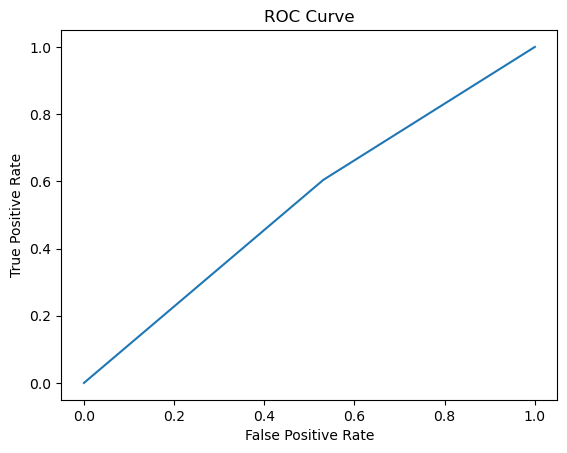

In [20]:
%%time
#visualization of ROC Curve

display(sk_metrics.roc_curve(y_test, y_pred))
print('\n\n')

plt.plot(sk_metrics.roc_curve(y_test, y_pred)[0], sk_metrics.roc_curve(y_test, y_pred)[1])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Decision Tree

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
%%time
dtc = DecisionTreeClassifier(random_state=27) #criterion='gini's
dtc.fit(X_train,y_train)

CPU times: user 2.73 s, sys: 59.4 ms, total: 2.79 s
Wall time: 2.82 s


DecisionTreeClassifier(random_state=27)

In [23]:
%%time
y_pred = dtc.predict(X_test)
y_pred

CPU times: user 65.1 ms, sys: 9.31 ms, total: 74.4 ms
Wall time: 75.2 ms


array([0, 0, 0, ..., 0, 1, 1])

In [24]:
%%time
print('confusion matrix:')
display(sk_metrics.confusion_matrix(y_test, y_pred))

results = pd.DataFrame({'accuracy':[sk_metrics.accuracy_score(y_test, y_pred)],
                  'recall':[sk_metrics.recall_score(y_test, y_pred)],
                  'precision':[sk_metrics.precision_score(y_test, y_pred)],
                  'f1':[sk_metrics.f1_score(y_test, y_pred)],
                  'sensitivity':[im_metrics.sensitivity_score(y_test, y_pred)],
                  'specificity':[im_metrics.specificity_score(y_test, y_pred)],
                  'roc_auc':[sk_metrics.roc_auc_score(y_test, y_pred)],
                 }
                )
results

confusion matrix:


array([[84158, 16162],
       [12936, 87384]])

CPU times: user 458 ms, sys: 31.7 ms, total: 490 ms
Wall time: 506 ms


,accuracy,recall,precision,f1,sensitivity,specificity,roc_auc
0,0.854974,0.871053,0.843915,0.857269,0.871053,0.838896,0.854974


(array([0.        , 0.16110447, 1.        ]),
 array([0.        , 0.87105263, 1.        ]),
 array([2, 1, 0]))




CPU times: user 75.7 ms, sys: 4.66 ms, total: 80.4 ms
Wall time: 79.3 ms


Text(0.5, 0, 'False Positive Rate')

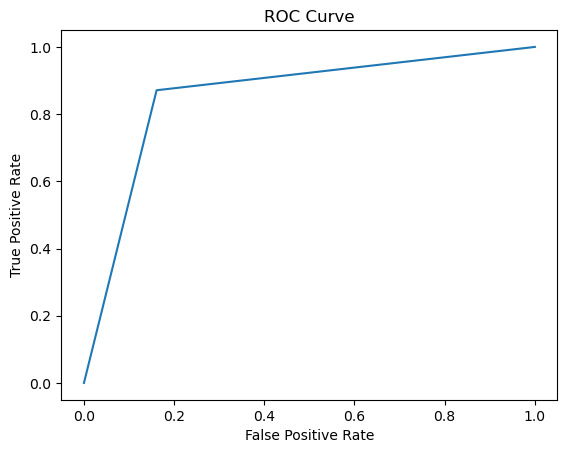

In [25]:
%%time
#visualization of ROC Curve

display(sk_metrics.roc_curve(y_test, y_pred))
print('\n\n')

plt.plot(sk_metrics.roc_curve(y_test, y_pred)[0], sk_metrics.roc_curve(y_test, y_pred)[1])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
%%time
rfc = RandomForestClassifier(random_state=27) #criterion='gini'
rfc.fit(X_train,y_train)

CPU times: user 1min 4s, sys: 977 ms, total: 1min 5s
Wall time: 1min 6s


RandomForestClassifier(random_state=27)

In [28]:
%%time
y_pred = rfc.predict(X_test)
y_pred

CPU times: user 4.88 s, sys: 475 ms, total: 5.35 s
Wall time: 5.37 s


array([0, 0, 0, ..., 0, 1, 1])

In [29]:
%%time
print('confusion matrix:')
display(sk_metrics.confusion_matrix(y_test, y_pred))

results = pd.DataFrame({'accuracy':[sk_metrics.accuracy_score(y_test, y_pred)],
                  'recall':[sk_metrics.recall_score(y_test, y_pred)],
                  'precision':[sk_metrics.precision_score(y_test, y_pred)],
                  'f1':[sk_metrics.f1_score(y_test, y_pred)],
                  'sensitivity':[im_metrics.sensitivity_score(y_test, y_pred)],
                  'specificity':[im_metrics.specificity_score(y_test, y_pred)],
                  'roc_auc':[sk_metrics.roc_auc_score(y_test, y_pred)],
                 }
                )
results

confusion matrix:


array([[85391, 14929],
       [ 9348, 90972]])

CPU times: user 457 ms, sys: 23.3 ms, total: 480 ms
Wall time: 521 ms


,accuracy,recall,precision,f1,sensitivity,specificity,roc_auc
0,0.879002,0.906818,0.859029,0.882277,0.906818,0.851186,0.879002


(array([0.       , 0.1488138, 1.       ]),
 array([0.        , 0.90681818, 1.        ]),
 array([2, 1, 0]))




CPU times: user 71.1 ms, sys: 3.72 ms, total: 74.9 ms
Wall time: 73.2 ms


Text(0.5, 0, 'False Positive Rate')

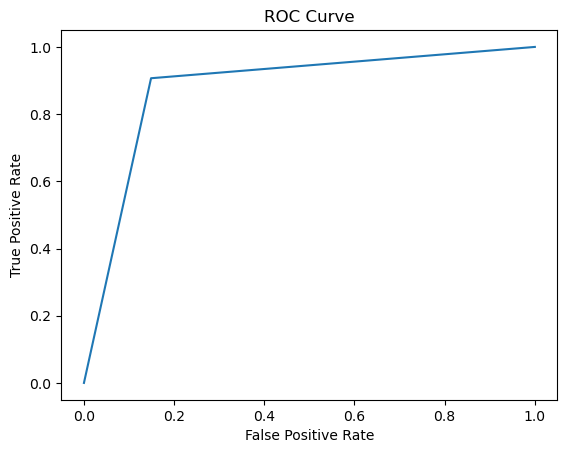

In [30]:
%%time
#visualization of ROC Curve
display(sk_metrics.roc_curve(y_test, y_pred))
print('\n\n')

plt.plot(sk_metrics.roc_curve(y_test, y_pred)[0], sk_metrics.roc_curve(y_test, y_pred)[1])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Gradient Boosting

In [31]:
from sklearn.ensemble import GradientBoostingClassifier

In [32]:
%%time
gbc = GradientBoostingClassifier(random_state=27)
gbc.fit(X_train,y_train)

CPU times: user 59.2 s, sys: 1.6 s, total: 1min
Wall time: 1min 4s


GradientBoostingClassifier(random_state=27)

In [33]:
%%time
y_pred = gbc.predict(X_test)
y_pred

CPU times: user 407 ms, sys: 70 ms, total: 477 ms
Wall time: 550 ms


array([0, 0, 0, ..., 0, 1, 1])

In [34]:
%%time
print('confusion matrix:')
display(sk_metrics.confusion_matrix(y_test, y_pred))

results = pd.DataFrame({'accuracy':[sk_metrics.accuracy_score(y_test, y_pred)],
                  'recall':[sk_metrics.recall_score(y_test, y_pred)],
                  'precision':[sk_metrics.precision_score(y_test, y_pred)],
                  'f1':[sk_metrics.f1_score(y_test, y_pred)],
                  'sensitivity':[im_metrics.sensitivity_score(y_test, y_pred)],
                  'specificity':[im_metrics.specificity_score(y_test, y_pred)],
                  'roc_auc':[sk_metrics.roc_auc_score(y_test, y_pred)],
                 }
                )
results

confusion matrix:


array([[77012, 23308],
       [ 8829, 91491]])

CPU times: user 461 ms, sys: 34.9 ms, total: 496 ms
Wall time: 517 ms


,accuracy,recall,precision,f1,sensitivity,specificity,roc_auc
0,0.839828,0.911992,0.796967,0.850608,0.911992,0.767663,0.839828


(array([0.        , 0.23233652, 1.        ]),
 array([0.        , 0.91199163, 1.        ]),
 array([2, 1, 0]))




CPU times: user 98.9 ms, sys: 19.2 ms, total: 118 ms
Wall time: 128 ms


Text(0.5, 0, 'False Positive Rate')

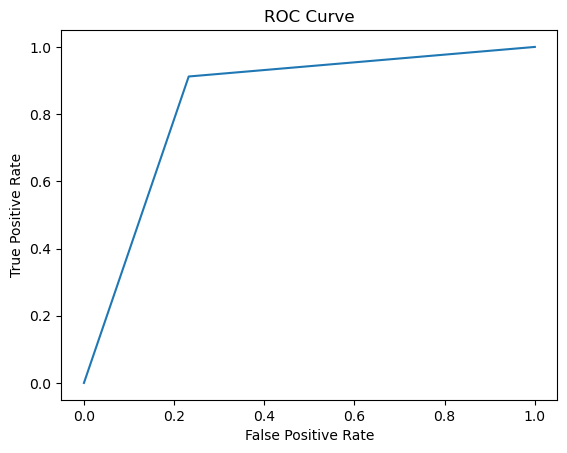

In [35]:
%%time
#visualization of ROC Curve
display(sk_metrics.roc_curve(y_test, y_pred))
print('\n\n')

plt.plot(sk_metrics.roc_curve(y_test, y_pred)[0], sk_metrics.roc_curve(y_test, y_pred)[1])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## XGBoost

In [36]:
from xgboost import XGBClassifier

In [37]:
%%time
xgbc = XGBClassifier(random_state=27)
xgbc.fit(X_train,y_train)

CPU times: user 8.58 s, sys: 933 ms, total: 9.52 s
Wall time: 2.88 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=27, ...)

In [38]:
%%time
y_pred = xgbc.predict(X_test)
y_pred

CPU times: user 680 ms, sys: 18.7 ms, total: 699 ms
Wall time: 327 ms


array([0, 0, 0, ..., 0, 1, 1])

In [39]:
%%time
print('confusion matrix:')
display(sk_metrics.confusion_matrix(y_test, y_pred))

results = pd.DataFrame({'accuracy':[sk_metrics.accuracy_score(y_test, y_pred)],
                  'recall':[sk_metrics.recall_score(y_test, y_pred)],
                  'precision':[sk_metrics.precision_score(y_test, y_pred)],
                  'f1':[sk_metrics.f1_score(y_test, y_pred)],
                  'sensitivity':[im_metrics.sensitivity_score(y_test, y_pred)],
                  'specificity':[im_metrics.specificity_score(y_test, y_pred)],
                  'roc_auc':[sk_metrics.roc_auc_score(y_test, y_pred)],
                 }
                )
results

confusion matrix:


array([[81770, 18550],
       [10553, 89767]])

CPU times: user 461 ms, sys: 23.5 ms, total: 485 ms
Wall time: 503 ms


,accuracy,recall,precision,f1,sensitivity,specificity,roc_auc
0,0.854949,0.894807,0.828743,0.860509,0.894807,0.815092,0.854949


(array([0.        , 0.18490829, 1.        ]),
 array([0.        , 0.89480662, 1.        ]),
 array([2, 1, 0]))




CPU times: user 72.9 ms, sys: 3.98 ms, total: 76.9 ms
Wall time: 76.5 ms


Text(0.5, 0, 'False Positive Rate')

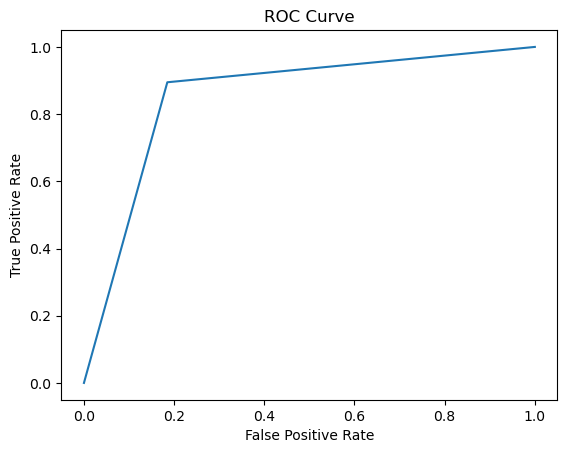

In [40]:
%%time
#visualization of ROC Curve

display(sk_metrics.roc_curve(y_test, y_pred))
print('\n\n')

plt.plot(sk_metrics.roc_curve(y_test, y_pred)[0], sk_metrics.roc_curve(y_test, y_pred)[1])
plt.title('ROC Curve')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')